In [ ]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/depression_anxiety_data.csv")
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [ ]:
print(df)

      id  school_year  age  gender        bmi          who_bmi  phq_score  \
0      1            1   19    male  33.333333  Class I Obesity          9   
1      2            1   18    male  19.841270           Normal          8   
2      3            1   19    male  25.102391       Overweight          8   
3      4            1   18  female  23.738662           Normal         19   
4      5            1   18    male  25.617284       Overweight          6   
..   ...          ...  ...     ...        ...              ...        ...   
778  779            4   24  female  21.096191           Normal          6   
779  780            4   22    male  25.308642       Overweight          4   
780  781            4   22    male  22.720438           Normal          2   
781  782            4   22  female  23.033168           Normal         17   
782  783            4   22    male  22.598140           Normal          6   

    depression_severity depressiveness suicidal depression_diagnosis  \
0  

In [ ]:
df.size

14877

In [ ]:
df.shape

(783, 19)

In [ ]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [ ]:
df.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [ ]:
df.describe()

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,775.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.376774
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,3.996443
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.500000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


In [ ]:
df.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [ ]:
#to ignore or del the missing value
 #1)Dropping the rows with most missing values
df.dropna()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [ ]:
#use default values in place of missing values
df.fillna(0)

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [ ]:
#check the missing value in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [ ]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [ ]:
df.tail()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True
782,783,4,22,male,22.598140,Normal,6,Mild,False,False,False,False,6,Mild,False,False,False,0.0,False


<Axes: >

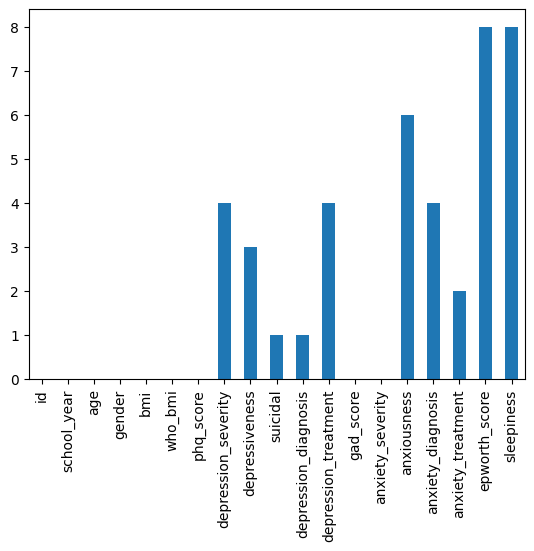

In [ ]:
#easier to identify
df.isna().sum().plot(kind='bar')

In [ ]:
df.ndim     #Displaying the number of dimensions

2

In [ ]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df[['sleepiness']].values.astype(float))
df['normalizes']=scaled_df
df[['sleepiness','normalizes']]

,sleepiness,normalizes
0,0,-0.47164
1,1,1.88055
2,0,-0.47164
3,1,1.88055
4,0,-0.47164
...,...,...
778,0,-0.47164
779,0,-0.47164
780,0,-0.47164
781,1,1.88055


In [ ]:
#SMOTE
'''to remove imbalanced data from the dataset'''
#!pip install imblearn

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
Y = df[['sleepiness']]
X = df.drop(columns=['sleepiness'])     #this will drop the column named category
X
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state = 42)
x_train_new,y_train_new = sm.fit_resample(x_train,y_train)
y_train.value_counts()

sleepiness
0             473
1             107
2               7
dtype: int64

In [ ]:
y_train_new.value_counts()

sleepiness
0             473
1             473
2             473
dtype: int64

In [ ]:
#NORMALIZATION
'''Normalization is used to scale and standardize data,
ensuring consistent and comparable ranges for improved model training and performance in machine learning.'''
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()

#create an object to transform the data to fit minmax processor
x_scaled = min_max_scalar.fit_transform(df[["suicidal"]].values.astype(float))

#Run the normalizer on the datafreame
df_mormalized = pd.DataFrame(x_scaled)
df['normalized2'] = x_scaled
df.sort_values(by='sleepiness')
df[['sleepiness','normalized2']]

,sleepiness,normalized2
0,0,0.0
1,1,0.0
2,0,0.0
3,1,0.5
4,0,0.0
...,...,...
778,0,0.0
779,0,0.0
780,0,0.0
781,1,0.0


In [ ]:
#CLASSIFICATION ALOGRITHM
#seperating target and feature
Y = df[['sleepiness']]
X = df.drop(columns=['sleepiness'])     #this will drop the column named category
X

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,normalized2,normalizes
0,0,0,1,1,499,0,9,0,0,0,0,0,11,2,1,0,0,7,0.0,-0.47164
1,1,0,0,1,81,3,8,0,0,0,0,0,5,1,0,0,0,14,0.0,1.88055
2,2,0,1,1,341,5,8,0,0,0,0,0,6,1,0,0,0,6,0.0,-0.47164
3,3,0,0,0,281,3,19,2,1,1,0,0,15,4,1,0,0,11,0.5,1.88055
4,4,0,0,1,366,5,6,0,0,0,0,0,14,2,1,0,0,3,0.0,-0.47164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,778,3,6,0,136,3,6,0,0,0,0,0,1,3,0,0,0,3,0.0,-0.47164
779,779,3,4,1,351,5,4,3,0,0,0,0,6,1,0,0,0,3,0.0,-0.47164
780,780,3,4,1,219,3,2,3,0,0,0,0,5,1,0,0,0,4,0.0,-0.47164
781,781,3,4,0,238,3,17,2,1,0,0,0,19,4,1,0,0,15,0.0,1.88055


In [ ]:
Y

,sleepiness
0,0
1,1
2,0
3,1
4,0
...,...
778,0
779,0
780,0
781,1


In [ ]:
#PREDICTING ON NEW DATA
'''integer-location based indexing used to extract the
16th row (index 15) from the DataFrame or Series X in Python'''

d1=X.iloc[15]
d1

id                      15.000000
school_year              0.000000
age                      0.000000
gender                   1.000000
bmi                     65.000000
who_bmi                  3.000000
phq_score                6.000000
depression_severity      0.000000
depressiveness           0.000000
depression_diagnosis     0.000000
depression_treatment     0.000000
gad_score                1.000000
anxiety_severity         3.000000
anxiousness              0.000000
anxiety_diagnosis        0.000000
anxiety_treatment        0.000000
epworth_score           14.000000
sleepiness               1.000000
normalized2              0.000000
normalizes              -0.311003
Name: 15, dtype: float64

In [ ]:
#transpose will swap rows and columns
#it will convert d1 into val_data

val_data = pd.DataFrame(d1)
val_data.transpose()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,normalized2,normalizes
15,15.0,0.0,0.0,1.0,65.0,3.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,14.0,1.0,0.0,-0.311003


In [ ]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,normalized2,normalizes
0,0,0,1,1,499,0,9,0,0,0,...,0,11,2,1,0,0,7,0,0,-0.311003
1,1,0,0,1,81,3,8,0,0,0,...,0,5,1,0,0,0,14,1,0,-0.311003
2,2,0,1,1,341,5,8,0,0,0,...,0,6,1,0,0,0,6,0,0,-0.311003
3,3,0,0,0,281,3,19,2,1,1,...,0,15,4,1,0,0,11,1,1,3.118790
4,4,0,0,1,366,5,6,0,0,0,...,0,14,2,1,0,0,3,0,0,-0.311003


In [ ]:
#RANDOM FOREST
'''Random Forest is an ensemble technique in machine learning,
used for predicting the accuracies of dataset'''

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Divide data in train test feature and target
Y = df[['sleepiness']]
X = df.drop(columns=['sleepiness'])
X

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# You can adjust the number of estimators and other hyperparameters as needed.

# Train the Random Forest classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-70-ff2a1bee606f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


Accuracy: 0.9948979591836735


In [ ]:
#NAIVE BAYES
'''Naive Bayes is a classification technique
used for predicting the accuracies.'''

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Divide data in train test feature and target
Y = df[['sleepiness']]
X = df.drop(columns=['sleepiness'])
X

# Create and train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

# Make predictions using Naive Bayes
predictions_naive_bayes = naive_bayes.predict(x_test)

# Calculate accuracy for Naive Bayes
accuracy_naive_bayes = accuracy_score(y_test, predictions_naive_bayes)
print("Naive Bayes Accuracy:", accuracy_naive_bayes)

Naive Bayes Accuracy: 0.8724489795918368


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#FOR DECISION TREE ACCURACY
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)
predictions=decision_tree.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print("Decision Tree Accuracy:",accuracy)

Decision Tree Accuracy: 1.0


In [ ]:
#SVM
'''SVM is used on binary classification on the
dataset for predicting the accuracies by performing train test'''

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your EEG data loaded into X (features) and y (target variable)

# Step 1: Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# Step 2: Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
# You can choose different kernels (e.g., 'linear', 'rbf', 'poly') and adjust the regularization parameter 'C' as needed.

# Step 3: Train the classifier
svm_classifier.fit(x_train, y_train)

# Step 4: Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy}')
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         2

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [ ]:
#ENSEMBLE TECHNIQUES
#Bagging
'''ensemble techniques improves the accuracies of the predicted dataset'''

import pandas as pd
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import VotingClassifier #bagging

#Divide data in train test feature and target
Y = df[['sleepiness']]
X = df.drop(columns=['sleepiness'])

estimators =[]
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('KNN',model1))
model2 = SVC()
estimators.append(('svm',model2))

#Create ensemble model
ensemble = VotingClassifier(estimators)#bagging ensemble
eclf1 = ensemble.fit(X,Y)
y1=eclf1.predict(X)
acc = accuracy_score(Y,y1)
print("Accuracy : ",acc)

Accuracy :  0.80970625798212


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
#Boosting
#Adoboost
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
num_trees = 50
kfold = model_selection.KFold(n_splits = 5)
model = AdaBoostClassifier(n_estimators = num_trees)
results = model_selection.cross_val_score(model,X,Y,cv=kfold)

print("",results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

 0.997452229299363


In [ ]:
 #CLASSIFICATION REPORT
 #Decision classifier object
dec = DecisionTreeClassifier()
# train the model on train set
dec.fit(x_train, y_train)
predictions = dec.predict(x_test)
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00         1

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [ ]:
#CLASSIFICATION REPORT
#Bayesian classifier object
bay = GaussianNB()
# train the model on train set
bay.fit(x_train, y_train)
predictions = bay.predict(x_test)
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       161
           1       0.67      0.76      0.71        34
           2       1.00      1.00      1.00         1

    accuracy                           0.89       196
   macro avg       0.87      0.89      0.88       196
weighted avg       0.90      0.89      0.90       196



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.0329847e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3541801e-05
 0.0000000e+00 1.4112710e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.0954208e-04 2.6214111e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.9728018e-01 0.0000000e+00 0.0000000e+00]


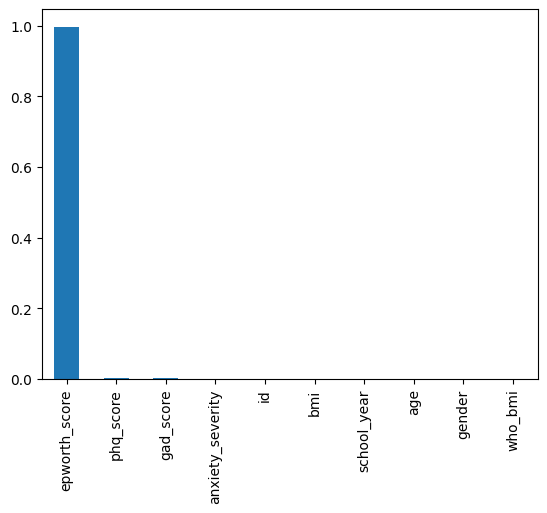

<Figure size 800x600 with 0 Axes>

In [ ]:
#fEATURE SELECTION METHOD
import xgboost
import matplotlib.pyplot as plt
model =xgboost.XGBClassifier()
model.fit(X,Y)
print(model.feature_importances_)
# plot the graph of feature importances for better visualization
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='bar')
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


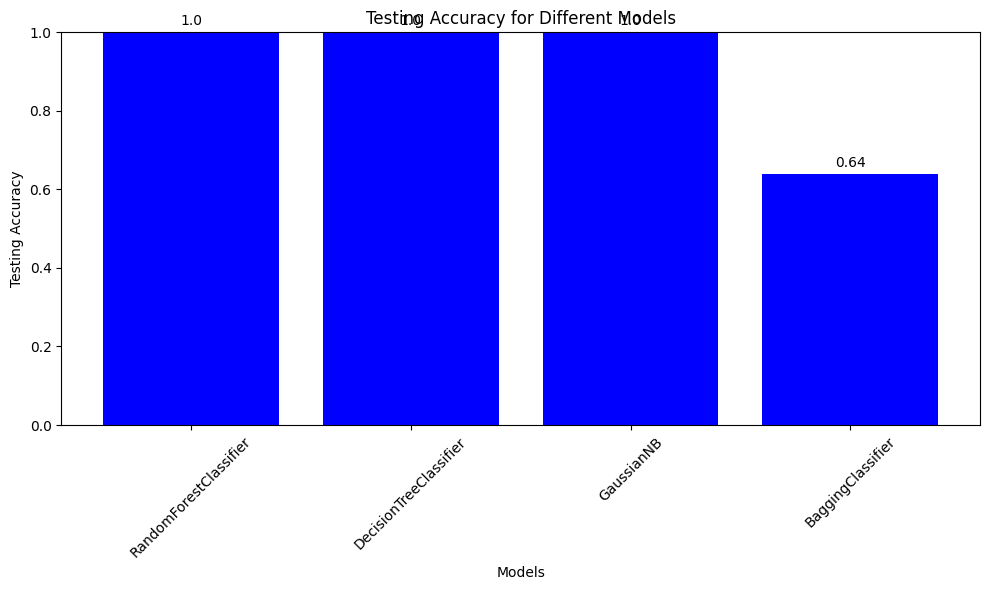

In [ ]:
#TESTED ACCURACIES FOR DIFFERENT MODEL
import matplotlib.pyplot as plt

# List of model names
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'BaggingClassifier']

# List of testing accuracy values for each model (replace with your actual values)
accuracy_values = [1.00, 1.0, 1.0, 0.64]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits between 0 and 1 (assuming accuracy is in the range [0, 1])

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the bar graph
plt.tight_layout()
plt.show()